# Autoregressive processes
* Theory
* Practical:
    * Stationarise the data
    * Build a lag
    * Predict
    * Undo stationarity on the prediction
    * Check autocorrelation
* Further reading:
    * Statsmodels AR model
    * Facebook Prophet


---

## Theory behind AR(P)

An autoregressive process is a stochastic process of the form:

$$
y_t = b + \sum_{j=1}^{P}w_{j}Y_{t-j} + \epsilon_t
$$

where $b$ is the bias, $w_j$ are the weights of the model and $\epsilon$ is some iid (e.g. Gaussian) noise. For the noise it holds that $E(\epsilon_t) = E(\epsilon) = 0$ and $V(\epsilon_t) = V(\epsilon) = \sigma^2$. E.g. expectation and variance are constant and time invariant.


For the case of $P=1$ we can write the process as:

$$
y_t = b + w_1Y_{t-1} + \epsilon_t
$$










---

### Practical:
* Stationarise the data
* Build a lag
* Predict
* Undo stationarity on the prediction
* Check autocorrelation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = sns.load_dataset('flights')

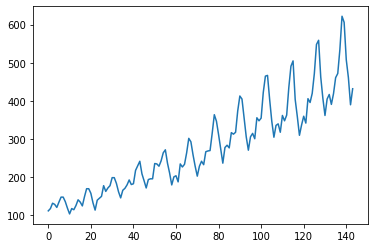

In [4]:
df.passengers.plot()

In [5]:
df['datetime'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df['Date'] = pd.to_datetime(df.month.astype(str) + '-' + df.year.astype(str))
df.set_index('Date', inplace=True)
df.head()

,year,month,passengers,datetime
Date,,,,
1949-01-01,1949,January,112,1949-01-01
1949-02-01,1949,February,118,1949-02-01
1949-03-01,1949,March,132,1949-03-01
1949-04-01,1949,April,129,1949-04-01
1949-05-01,1949,May,121,1949-05-01


---

## Stationarise the data


* What do we need to remove to ensure stationarity?

#### Trend

In [6]:
df['difference'] = df.passengers.diff()

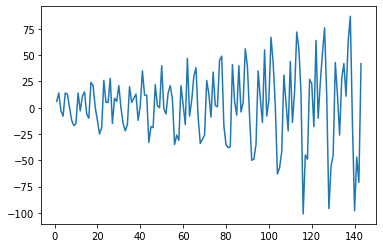

In [7]:
df.difference.plot()

#### Variance

In [8]:
df['log_diff'] = np.log(df.difference)

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Seasonality

---

## Create a lag
* An autoregression model is a linear regression model that uses lagged variables as input variables, so we need to identify and define p
* The lag of p will be how far into the future we are predicting!

---

## Predict

### Train-Test Split:
- Last 20 months -> Testing
- All months except the Last 20 -> Training

---

## Reconstruct

---

### Check auto-correlation

In [29]:
# !pip install --upgrade statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF Plot Explained: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- "Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values **outside** of this code are very likely a correlation and **not** a statistical fluke."
- So basically, the AR model is taking the first 13 time lags because they are highly correlated with the prediction column (no. of passengers) and they are statistically significant.

---

### Further reading:
* Seasonal decomposition
* Statsmodels AR model
* Facebook Prophet
* non-manual - dickey-fuller, seasonal adjustment

#### Seasonal Decomposition

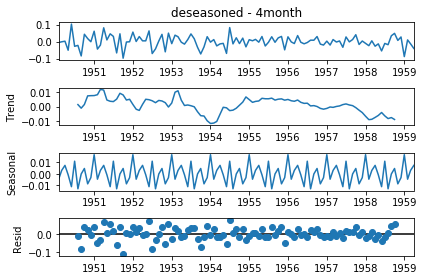

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
sdc = seasonal_decompose(X_train['deseasoned - 4month'], period=12, model='additive')
sdc.plot()
None

#### Statsmodel AR

In [ ]:
from statsmodels.tsa.ar_model import AR

ar = AR(df['passengers'])
ar_fitted = ar.fit()
ar_fitted.predict(end='1968')
ypred = ar_fitted.predict(end='1968')
plt.plot(ypred)
plt.plot(df['passengers'])

#### FB Prophet 

- https://facebook.github.io/prophet/docs/quick_start.html#python-api

#### Non-manual

- https://en.wikipedia.org/wiki/Seasonal_adjustment
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html